# Z3 SAT Exercises

> Before trying to solve the exercises contained in this notebook, the reader is suggested to have gained experience with the tool through the `Tutorial.ipynb` notebook.

In [1]:
!pip3 install z3-solver

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
from itertools import combinations
from z3 import *
from utils import *

## Useful contraints

In [2]:
def at_least_one(bool_vars):
    return Or(bool_vars)

def at_most_one(bool_vars):
    return [Not(And(pair[0], pair[1])) for pair in combinations(bool_vars, 2)]

def exactly_one(bool_vars):
    return at_most_one(bool_vars) + [at_least_one(bool_vars)]

## Knights and Knaves

In [9]:
# Which are the variables?
AisKnight = Bool("AisKnight")
BisKnight = Bool("BisKnight")

s = Solver()

# Encode A's statement
AStatement = Or(Not(AisKnight), BisKnight)

# If A is a knight, then A's statement is true
s.add(Implies(AisKnight, AStatement))
# If A is a knave, then A's statement is a lie
s.add(Implies(Not(AisKnight), Not(AStatement)))

# Unicity check
# s.add(Not(And(AisKnight, BisKnight)))

if s.check() == sat:
    print(s.model())
else:
    print("Failed to solve")

[AisKnight = True, BisKnight = True]


## Coloring graph

Another famous problem is the [coloring graph](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjAlpGV4az2AhUP2aQKHY_5BQwQFnoECAQQAQ&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FGraph_coloring&usg=AOvVaw0F_XS2AN3uz4G-IJx5Q8j0). 

Given a graph $({v_1,...,v_n},E)$ and $d$ colors, we need to assign a color to each vertex, s.t. if $(v_i,v_j) ∈ E$ then color of $v_i$ is different from color of $v_j$. 

In [34]:
def coloring_graph_sat(n, d, E):
    # Create the variables, x_i_j = 1 iff vertex i is colored with color j.
    v = [[Bool(f"x_{i}_{j}") for j in range(d)] for i in range(n)]
    
    # Solver instance
    s = Solver()
    
    # Each vertex has at least one color 
    for i in range(n):
        s.add(at_least_one(v[i]))
    
    # Each edge must have different colors in its vertices
    for i, j in E:
        for k in range(d):
            s.add(Or(Not(v[i][k]), Not(v[j][k])))
    
    s.check()
    m = s.model()
    
    return [(i, j) for i in range(n) for j in range(d) if m.evaluate(v[i][j])]    

In [29]:
instance1 = {
        "n" : 5,
        "d": 3,
        "E" : [
            (0, 2),
            (0, 4),
            (1, 2),
            (1, 4),
            (2, 3), 
            (3, 4)
        ]
    }
instance2 = {
        "n":10,
        "d":3,
        "E":[
            (0, 1),
            (0, 4),
            (0, 5),
            (1, 2),
            (1, 6),
            (2, 7),
            (2, 3),
            (3, 8),
            (3, 4),
            (4, 9),
            (9, 6),
            (9, 7),
            (6, 8),
            (5, 7),
            (5, 8), 
        ]
}

In [35]:
instance = instance2

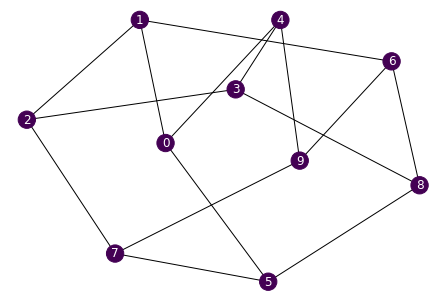

In [36]:
display_color_graph(E = instance["E"])

CPU times: user 83.9 ms, sys: 5.02 ms, total: 89 ms
Wall time: 97 ms


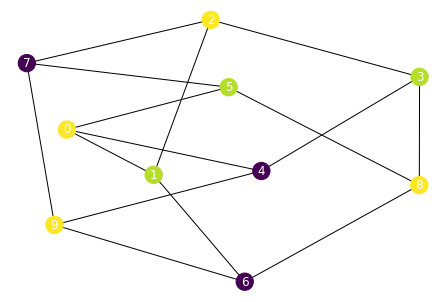

In [37]:
%%time
display_color_graph(sol = coloring_graph_sat(instance["n"], instance["d"], instance["E"]), E = instance["E"])

## N-Queens

The [n-queens problem](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is the problem of placing n chess queens in a $nxn$ chessboard so that no two queens threaten each other. In light of this, the solution requires that no two queens share the same row, column, or diagonal.

In [15]:
def nqueens_sat(n):
    # Create all the variables
    p = [[Bool(f"x_{i}_{j}") for j in range(n)] for i in range(n)]

    # Create the solver instance
    s = Solver()

    # At least one on each row and column
    for i in range(n):
        s.add(at_least_one(p[i]))
        s.add(at_least_one([p[j][i] for j in range(n)]))

    # At most one on each row and column
    for i in range(n):
        col_i = []
        for j in range(n):
            col_i += [p[j][i]]
        s.add(at_most_one(p[i]))
        s.add(at_most_one(col_i))

    # Add the diagonal constraints
    for i in range(n - 1):
        diag_ru = []
        diag_lu = []
        diag_rl = []
        diag_ll = []
        for j in range(n - i):
            diag_ru += [p[i + j][j]]
            diag_lu += [p[n - 1 - (i + j)][j]]
            diag_rl += [p[i + j][n - 1 - j]]
            diag_ll += [p[n - 1 - (i + j)][n - 1 - j]]
        s.add(at_most_one(diag_ru))
        s.add(at_most_one(diag_lu))
        s.add(at_most_one(diag_rl))
        s.add(at_most_one(diag_ll))

    s.check()

    m = s.model()
    return [(i, j) for i in range(n) for j in range(n) if m.evaluate(p[i][j])]

In [16]:
%%time
display_nqueens(nqueens_sat(20))

. . . . . . . . . . . . . ♛ . . . . . . 
. . . . . . . . . . . ♛ . . . . . . . . 
. . . . . . . . . . . . . . ♛ . . . . . 
. . . . . . . . . . . . ♛ . . . . . . . 
. . . . . . . . . . ♛ . . . . . . . . . 
. ♛ . . . . . . . . . . . . . . . . . . 
. . . ♛ . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . ♛ . . . . 
♛ . . . . . . . . . . . . . . . . . . . 
. . ♛ . . . . . . . . . . . . . . . . . 
. . . . . . . . . ♛ . . . . . . . . . . 
. . . . . . ♛ . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . ♛ 
. . . . . . . . . . . . . . . . ♛ . . . 
. . . . ♛ . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . ♛ . . 
. . . . . ♛ . . . . . . . . . . . . . . 
. . . . . . . . ♛ . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . ♛ . 
. . . . . . . ♛ . . . . . . . . . . . . 
CPU times: user 2.4 s, sys: 20.9 ms, total: 2.42 s
Wall time: 2.47 s


## Sudoku

[Sudoku](https://en.wikipedia.org/wiki/Sudoku) is a logic-based, combinatorial number-placement puzzle. In classic sudoku, the objective is to fill a 9 × 9 grid with digits so that each column, each row, and each of the nine 3 × 3 subgrids that compose the grid contain all of the digits from 1 to 9. 

In [39]:
# Sudoku instances, '0's correspond to empty cells

instance1 = ((0, 0, 0, 0, 9, 4, 0, 3, 0),
             (0, 0, 0, 5, 1, 0, 0, 0, 7),
             (0, 8, 9, 0, 0, 0, 0, 4, 0),
             (0, 0, 0, 0, 0, 0, 2, 0, 8),
             (0, 6, 0, 2, 0, 1, 0, 5, 0),
             (1, 0, 2, 0, 0, 0, 0, 0, 0),
             (0, 7, 0, 0, 0, 0, 5, 2, 0),
             (9, 0, 0, 0, 6, 5, 0, 0, 0),
             (0, 4, 0, 9, 7, 0, 0, 0, 0))

instance2 = ((0, 0, 0, 0, 9, 0, 1, 0, 0),
             (2, 8, 0, 0, 0, 5, 0, 0, 0),
             (7, 0, 0, 0, 0, 6, 4, 0, 0),
             (8, 0, 5, 0, 0, 3, 0, 0, 6),
             (0, 0, 1, 0, 0, 4, 0, 0, 0),
             (0, 7, 0, 2, 0, 0, 0, 0, 0),
             (3, 0, 0, 0, 0, 1, 0, 8, 0),
             (0, 0, 0, 0, 0, 0, 0, 5, 0),
             (0, 9, 0, 0, 0, 0, 0, 7, 0))

instance3 = ((0, 7, 0, 0, 0, 0, 0, 4, 9),
             (0, 0, 0, 4, 0, 0, 0, 0, 0),
             (4, 0, 3, 5, 0, 7, 0, 0, 8),
             (0, 0, 7, 2, 5, 0, 4, 0, 0),
             (0, 0, 0, 0, 0, 0, 8, 0, 0),
             (0, 0, 4, 0, 3, 0, 5, 9, 2),
             (6, 1, 8, 0, 0, 0, 0, 0, 5),
             (0, 9, 0, 1, 0, 0, 0, 3, 0),
             (0, 0, 5, 0, 0, 0, 0, 0, 7))

instance4 = ((0, 0, 0, 0, 0, 6, 0, 0, 0),
             (0, 5, 9, 0, 0, 0, 0, 0, 8),
             (2, 0, 0, 0, 0, 8, 0, 0, 0),
             (0, 4, 5, 0, 0, 0, 0, 0, 0),
             (0, 0, 3, 0, 0, 0, 0, 0, 0),
             (0, 0, 6, 0, 0, 3, 0, 5, 4),
             (0, 0, 0, 3, 2, 5, 0, 0, 6),
             (0, 0, 0, 0, 0, 0, 0, 0, 0),
             (0, 0, 0, 0, 0, 0, 0, 0, 0))

In [40]:
def sudoku_sat(instance):
    # All the variables we need: for each cell, nine variables that determine which digit must be assigned.
    v = [[[Bool(f"v_{i}_{j}_{k}") for k in range(9)] for j in range(9)] for i in range(9)]

    s = Solver()

    # A cell has only one value
    for i in range(9):
        for j in range(9):
            s.add(exactly_one(v[i][j]))

    # Each value is used only once in a row
    for j in range(9):
        for k in range(9):
            s.add(exactly_one([v[i][j][k] for i in range(9)]))

    # Each value used exactly once in each column
    for i in range(9):
        for k in range(9):
            s.add(exactly_one([v[i][j][k] for j in range(9)]))

    # Each value used exactly once in each 3x3 grid.
    for ii in range(3):
        for jj in range(3):
            for k in range(9):
                grid_cells = [v[3 * ii + a][3 * jj + b][k] for a in range(3) for b in range(3)]
                s.add(exactly_one(grid_cells))

    # Some numbers are already available
    for i in range(9):
        for j in range(9):
            if instance[i][j] > 0:
                s.add(v[i][j][instance[i][j] - 1])

    if s.check() == sat:
        m = s.model()
        sol = []
        for i in range(9):
            sol.append([])
            for j in range(9):
                for k in range(9):
                    if m.evaluate(v[i][j][k]):
                        sol[i].append(k+1)
        return sol
    else:
        print("Failed to solve")

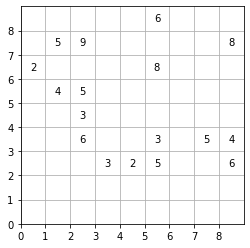

In [41]:
# Select the instance you want to solve
instance = instance4
display_sudoku(instance)

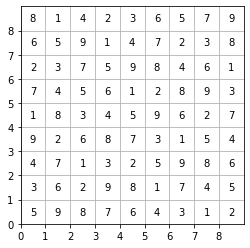

CPU times: user 2.78 s, sys: 90.1 ms, total: 2.87 s
Wall time: 2.87 s


In [42]:
%%time
display_sudoku(sudoku_sat(instance))

## Nurse scheduling problem

In the next example, called [nurse scheduling problem](https://en.wikipedia.org/wiki/Nurse_scheduling_problem), a hospital supervisor needs to create a schedule for $n$ nurses over a fixed day period, subject to the following conditions:

- Each day is divided into three 8-hour shifts.
- Every day, each shift is assigned to a single nurse, and no nurse works more than one shift.
- Each nurse is assigned to a minimum amount of shifts during the given days period.


In [3]:
instance1 = {
    "num_nurses" : 4,
    "num_shifts" : 3,
    "num_days" : 3
}

instance2 = {
    "num_nurses" : 4,
    "num_shifts" : 3,
    "num_days" : 4
}

### Advanced useful contraints

In [4]:
def at_least_k_np(bool_vars, k):
    return at_most_k_np([Not(var) for var in bool_vars], len(bool_vars)-k)

def at_most_k_np(bool_vars, k):
    return And([Or([Not(x) for x in X]) for X in combinations(bool_vars, k + 1)])

def exactly_k_np(bool_vars, k):
    return And(at_most_k_np(bool_vars, k), at_least_k_np(bool_vars, k))

## Try it yourself!

Try to model the variables and constraints to solve the nurse scheduling problem, starting from the examples listed above. 

If possible, shifts should be distributed evenly and fairly, so that each nurse works the minimum amount of them. If this is not possible, because the total number of shifts is not divisible by the number of nurses, some nurses will be assigned one more shift, without crossing the maximum number of shifts which can be worked by each nurse

In [11]:
def nurse_scheduling_sat(num_nurses, num_shifts, num_days):
    # Create all the variables, shifts[i, j, k] is True if shift k is assigned to nurse i on day j.
    shifts = [[[Bool(f"x_{i}_{j}_{k}") for k in range(num_shifts)] for j in range(num_days)] for i in range(num_nurses)]

    s = Solver()
    
    # In each shift can work just one nurse
    for j in range(num_days):
        for k in range(num_shifts):
            s.add(exactly_one([shifts[i][j][k] for i in range(num_nurses)]))
    
    # Each nurse can work just one shift per day 
    for i in range(num_nurses):
        for j in range(num_days):
            s.add(at_most_one(shifts[i][j]))
    
    # Fair assignment of shifts
    min_n_shifts_per_nurse = (num_days * num_shifts) // num_nurses
    
    if (num_days * num_shifts) % num_nurses == 0:
        max_n_shifts_per_nurse = min_n_shifts_per_nurse
    else:
        max_n_shifts_per_nurse = min_n_shifts_per_nurse + 1
    
    for i in range(num_nurses):
        shifts_worked = []
        for j in range(num_days):
            for k in range(num_shifts):
                shifts_worked.append(shifts[i][j][k])
        s.add(at_least_k_np(shifts_worked, min_n_shifts_per_nurse))
        s.add(at_most_k_np(shifts_worked, max_n_shifts_per_nurse))
    
    
    if s.check() == sat:
        m = s.model()
        return [(i, j, k) for i in range(num_nurses) for j in range(num_days) for k in range(num_shifts) if m.evaluate(shifts[i][j][k])]
    else:
        print("unsat")
    

In [12]:
instance = instance1

In [13]:
%%time
display_nurses_shifts(nurse_scheduling_sat(instance["num_nurses"], instance["num_shifts"], instance["num_days"]), instance["num_nurses"], instance["num_shifts"], instance["num_days"])

Day 0
  Nurse 0 works shift 0
  Nurse 1 does not work
  Nurse 2 works shift 2
  Nurse 3 works shift 1
Day 1
  Nurse 0 works shift 2
  Nurse 1 works shift 1
  Nurse 2 does not work
  Nurse 3 works shift 0
Day 2
  Nurse 0 works shift 2
  Nurse 1 works shift 1
  Nurse 2 works shift 0
  Nurse 3 does not work
CPU times: user 337 ms, sys: 10.5 ms, total: 348 ms
Wall time: 390 ms


In [63]:
instance = instance2

In [64]:
%%time
display_nurses_shifts(nurse_scheduling_sat(instance["num_nurses"], instance["num_shifts"], instance["num_days"]), instance["num_nurses"], instance["num_shifts"], instance["num_days"])

Day 0
  Nurse 0 works shift 2
  Nurse 1 works shift 1
  Nurse 2 works shift 0
  Nurse 3 does not work
Day 1
  Nurse 0 does not work
  Nurse 1 works shift 2
  Nurse 2 works shift 1
  Nurse 3 works shift 0
Day 2
  Nurse 0 works shift 1
  Nurse 1 does not work
  Nurse 2 works shift 0
  Nurse 3 works shift 2
Day 3
  Nurse 0 works shift 2
  Nurse 1 works shift 1
  Nurse 2 does not work
  Nurse 3 works shift 0
CPU times: user 3min 11s, sys: 1.68 s, total: 3min 13s
Wall time: 3min 19s
